# KNN

### What is KNN?

- Supervised Algorithm
- Makes predictions based on how close a new data point is to known data points.
- Lazy
- Sensitive to scaling

Link: [KNN Diagram](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

#### Pros:
1. Simple
2. Robust to noise
3. Effective with large datasets
4. Performs calculations "just in time"
5. Data is easy to keep up to date to keep predictions accurate

#### Cons:
1. Need to determine how many neighbors is optimal
2. Computation cost is high (has to calculate every single distance to every feature)
3. Euclidean volume increases exponentially as number of features increases (curse of dimensionality)

In [1]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

## Acquire (Iris Dataset)

In [2]:
# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Prepare/Preprocessing

In [3]:
# split into train, validate, test
train, test = train_test_split(df, stratify=df['species'], train_size=0.8, random_state=1349)
train, validate = train_test_split(train, stratify=train['species'], train_size=0.7, random_state=1349)

# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['species', 'petal_length', 'petal_width'])
y_train = train.species

X_validate = validate.drop(columns=['species', 'petal_length', 'petal_width'])
y_validate = validate.species

X_test = test.drop(columns=['species', 'petal_length', 'petal_width'])
y_test = test.species

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

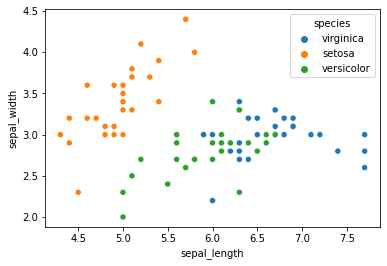

In [9]:
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')

## Train Model

#### Create KNN Object

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

#### Fit the Model to the Training Data

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Make Predictions

In [13]:
y_pred = knn.predict(X_train)
y_pred

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa

#### Estimate Probability

In [15]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Evaluate Model

#### Compute the Accuracy

In [16]:
pd.crosstab(y_train, y_pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,28,0,0
versicolor,0,26,2
virginica,0,3,25


#### Create a Classification Report

In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      0.93      0.91        28
   virginica       0.93      0.89      0.91        28

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



## Lets Do it Again

In [22]:
# Create KNN Object
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Fit object to training data
knn1.fit(X_train, y_train)
# Make predictions on training data
y_pred1 = knn1.predict(X_train)

How does the boundary map for **k = 5** compared to **k = 1**?

In [23]:
# Evaluate the new model
print(classification_report(y_train, y_pred1))


              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        28
  versicolor       0.78      0.75      0.76        28
   virginica       0.77      0.82      0.79        28

    accuracy                           0.85        84
   macro avg       0.85      0.85      0.85        84
weighted avg       0.85      0.85      0.85        84



In [26]:
# check validation of each knn and knn1

In [24]:
print(classification_report(y_validate, knn.predict(X_validate)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.62      0.67      0.64        12
   virginica       0.64      0.58      0.61        12

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



In [25]:
print(classification_report(y_validate, knn.predict(X_validate)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.62      0.67      0.64        12
   virginica       0.64      0.58      0.61        12

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



## Finding the Best value for k

In [29]:
model_set = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    model_set.append(knn)
    
    
for spot in model_set:
    print(classification_report(y_train, spot.predict(X_train)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      0.93      0.91        28
   virginica       0.93      0.89      0.91        28

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.76      1.00      0.86        28
   virginica       1.00      0.68      0.81        28

    accuracy                           0.89        84
   macro avg       0.92      0.89      0.89        84
weighted avg       0.92      0.89      0.89        84

              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        28
  versicolor       0.83      0.71      0.77        28
   virginica       0.76      0.89      0.82        28

    accuracy        

## Next Steps
- We only used sepal_length and sepal_width. We can try new models with different and/or additional features. 


- There are other hyperparameters we can tweak
    - 'weights': Uniform is the default (all points are treated equally), but we can switch to a 'distance' approach where nearer neighbors are given more weight in the voting process
    - 'algorithm': Large datasets use a sampling algorithm to save on computational cost. We can try different samplers. 
    - 'metric': There is more than one way to measure distance


- There are very similar models that we can try (RadiusNeighborsClassifier)